#zip extract

In [ ]:
import zipfile
import tarfile
import os

# Path to your zip file
zip_file_path = "/content/drive/MyDrive/labelled_images.zip"

# Directory where you want to extract the contents
extracted_dir = "/content/drive/MyDrive/labelled images"

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Step 1: Unzip the outer zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Step 2: Extract the contents of each tar.gz file
for root, dirs, files in os.walk(extracted_dir):
    for file in files:
        if file.endswith(".tar.gz"):
            tar_file_path = os.path.join(root, file)
            with tarfile.open(tar_file_path, "r:gz") as tar:
                tar.extractall(extracted_dir)

# Now, the contents of the tar.gz files are extracted in the "extracted_dir" directory.


In [ ]:
import os

# Define the directory where you want to remove .tar.gz files
directory = "/content/drive/MyDrive/labelled images"

# Function to remove .tar.gz files
def remove_tar_gz_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".tar.gz"):
            file_path = os.path.join(directory, filename)
            os.remove(file_path)
            print(f"Removed: {file_path}")

if os.path.exists(directory) and os.path.isdir(directory):
    remove_tar_gz_files(directory)
else:
    print("Directory does not exist.")

Removed: /content/drive/MyDrive/labelled images/ulcer.tar.gz
Removed: /content/drive/MyDrive/labelled images/reduced_mucosal_view.tar.gz
Removed: /content/drive/MyDrive/labelled images/pylorus.tar.gz
Removed: /content/drive/MyDrive/labelled images/normal_clean_mucosa.tar.gz
Removed: /content/drive/MyDrive/labelled images/polyp.tar.gz
Removed: /content/drive/MyDrive/labelled images/lymphangiectasia.tar.gz
Removed: /content/drive/MyDrive/labelled images/ileocecal_valve.tar.gz
Removed: /content/drive/MyDrive/labelled images/foreign_body.tar.gz
Removed: /content/drive/MyDrive/labelled images/erythema.tar.gz
Removed: /content/drive/MyDrive/labelled images/erosion.tar.gz
Removed: /content/drive/MyDrive/labelled images/blood_fresh.tar.gz
Removed: /content/drive/MyDrive/labelled images/angiectasia.tar.gz
Removed: /content/drive/MyDrive/labelled images/blood_hematin.tar.gz
Removed: /content/drive/MyDrive/labelled images/ampulla_of_vater.tar.gz


#code

In [ ]:
# Necessary imports

import cv2
import glob
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
import os

datadir = '/content/drive/MyDrive/labelled images'  # Replace with the path to your directory
categories = [category for category in os.listdir(datadir) if os.path.isdir(os.path.join(datadir, category))]

# The 'categories' list now contains the names of the subdirectories within 'labelled_images'.


In [ ]:
print("Number of categories:", len(categories))

Number of categories: 14


In [ ]:
categories

['Ampulla of vater',
 'Blood - hematin',
 'Polyp',
 'Erosion',
 'Erythema',
 'Reduced mucosal view',
 'Foreign body',
 'Lymphangiectasia',
 'Pylorus',
 'Angiectasia',
 'Blood - fresh',
 'Ileocecal valve',
 'Ulcer',
 'Normal clean mucosa']

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/labelled images/Blood - hematin/8ebf0e483cac48d6_1209.jpg')

In [ ]:
test_img.shape

(336, 336, 3)

In [ ]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


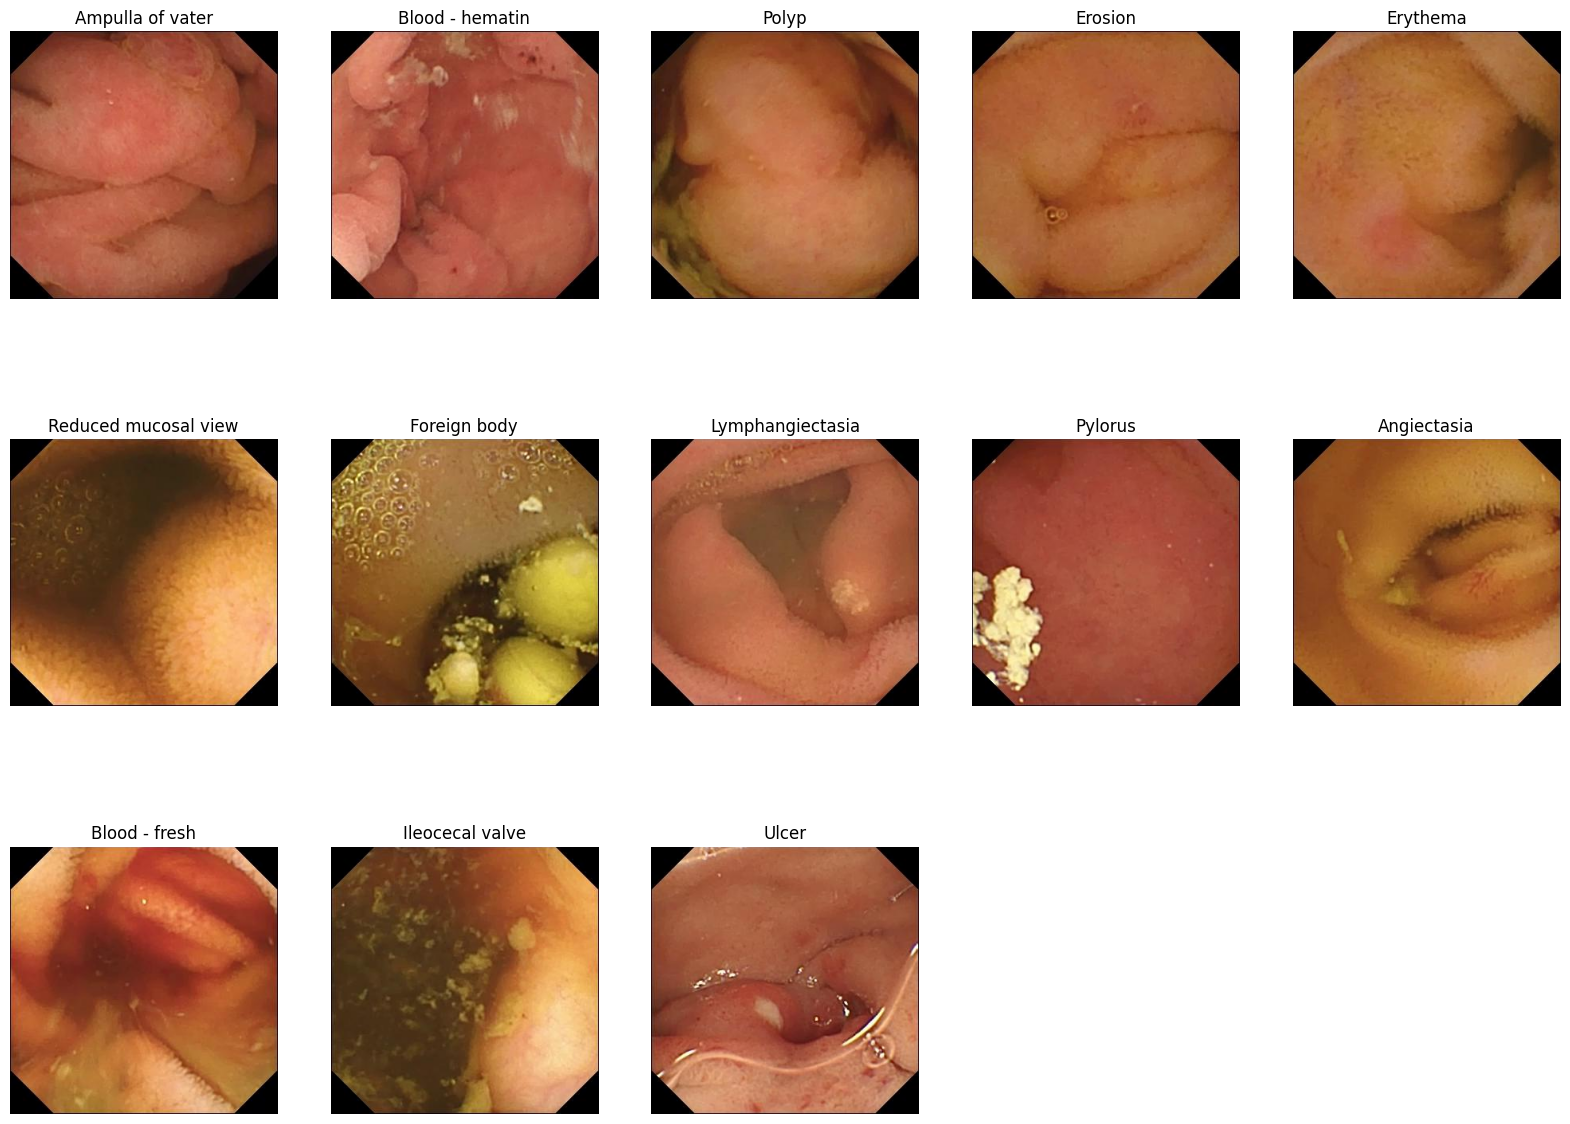

In [ ]:
import matplotlib.pyplot as plt
import random
import glob
import os
import cv2

# Define your data directory
datadir = '/content/drive/MyDrive/labelled images'  # Replace with the actual path to your data directory

# Get a list of subdirectories (class names) in the data directory
class_names = [d for d in os.listdir(datadir) if os.path.isdir(os.path.join(datadir, d))]

# Create a figure to display images
plt.figure(figsize=(20, 15))

# Loop through the class directories and display one example image from each class
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(datadir, class_name)
    image_files = glob.glob(os.path.join(class_dir, '*.jpg'))

    if image_files:
        # Choose a random image from the class
        img_path = random.choice(image_files)
        img = cv2.imread(img_path)

        # Display the image
        plt.subplot(3, 5, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(class_name)
        plt.axis("off")

plt.show()


In [ ]:
import os
import pandas as pd

datadir = '/content/drive/MyDrive/labelled images'
category_dirs = [d for d in os.listdir(datadir) if os.path.isdir(os.path.join(datadir, d))]

category_counts = pd.DataFrame({'Category': category_dirs,'Count': [len(os.listdir(os.path.join(datadir, d))) for d in category_dirs]})


In [ ]:
category_counts.sort_values("Count")

Category  Count
0       Ampulla of vater     10
1        Blood - hematin     12
2                  Polyp     55
4               Erythema    159
10         Blood - fresh    446
3                Erosion    506
7       Lymphangiectasia    592
6           Foreign body    776
12                 Ulcer    854
9            Angiectasia    866
8                Pylorus   1529
5   Reduced mucosal view   2906
11       Ileocecal valve   4189
13   Normal clean mucosa  34338

In [ ]:
# Size of the images to feed to the model
img_size = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="training",
  label_mode = 'categorical',
  seed=123,
  image_size=(img_size, img_size),
  batch_size=64)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="validation",
  label_mode = 'categorical',
  seed=123,
  image_size=(img_size, img_size),
  batch_size=64)

Found 47238 files belonging to 14 classes.
Using 37791 files for training.
Found 47238 files belonging to 14 classes.
Using 9447 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import json
import matplotlib.pyplot as plt

# Assuming you have train_ds, val_ds, train_labels, img_size, num_classes defined earlier

# Load class weights from weights.json and convert keys to integers
with open('/content/drive/MyDrive/model/class_weights.json', 'r') as json_file:
    class_weights = {int(key): value for key, value in json.load(json_file).items()}

# Create ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model using your TensorFlow datasets with callbacks and class weights
history = model.fit(
    train_ds,
    epochs=100,  # You can adjust the number of epochs
    validation_data=val_ds,
    callbacks=[early_stopping, lr_scheduler],
    batch_size=64  # Adjust batch size based on available memory
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(val_ds)
print("Test accuracy:", test_acc)

# Save the model to a file
model.save("/content/drive/MyDrive/model/my_resnet_model.h5")

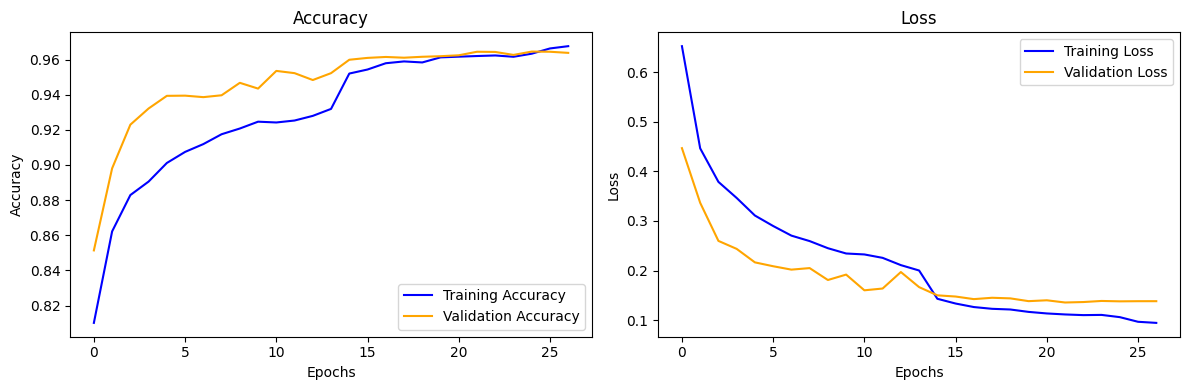

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Load the training history from the pickle file
with open('/content/drive/MyDrive/model/newtraining_history.pkl', 'rb') as pickle_file:
    history = pickle.load(pickle_file)

# Extract training and validation accuracy and loss
train_acc = history['accuracy']
val_acc = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']

# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training and validation accuracy
ax1.set_title('Accuracy')
ax1.plot(train_acc, label='Training Accuracy', color='blue')
ax1.plot(val_acc, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

# Plot training and validation loss
ax2.set_title('Loss')
ax2.plot(train_loss, label='Training Loss', color='blue')
ax2.plot(val_loss, label='Validation Loss', color='orange')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random

# Load your saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/model/my_newmodel.h5')

In [ ]:
test_accu = model.evaluate(val_ds)
print('The testing accuracy is :',test_accu[1]*100, '%')

296/296 [==============================] - 1918s 6s/step - loss: 0.1355 - accuracy: 0.9644
The testing accuracy is : 96.44331336021423 %


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random
from sklearn.metrics import classification_report, confusion_matrix

# Load your saved model
loaded_model =tf.keras.models.load_model('/content/drive/MyDrive/model/my_newmodel.h5')

# Initialize empty lists to store ground truth and predictions
ground_truth = []
predictions = []

# Loop through the validation dataset to get true labels and model predictions
for images, labels in val_ds:
    true_labels = np.argmax(labels, axis=1)  # Convert one-hot encoded labels to class indices
    predicted_labels = loaded_model.predict(images)
    predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert model predictions to class indices

    ground_truth.extend(true_labels)
    predictions.extend(predicted_labels)

# Calculate and print classification report
class_names = ["Ampulla of vater", "Blood - hematin", "Polyp", "Erythema", "Blood - fresh", "Erosion",
               "Lymphangiectasia", "Foreign body", "Ulcer", "Angiectasia", "Pylorus", "Reduced mucosal view",
               "Ileocecal valve", "Normal clean mucosa"]

print(classification_report(ground_truth, predictions, target_names=class_names))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(ground_truth, predictions)
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 2s 2s/step
                      precision    recall  f1-score   support

    Ampulla of vater       0.00      0.00      0.00         2
     Blood - hematin       0.97      0.85      0.91       172
               Polyp       0.99      0.91      0.95        79
            Erythema       1.00      0.50      0.67         4
       Blood - fresh       0.97      0.47      0.63       119
             Erosion       1.00      0.34      0.51        35
    Lymphangiectasia       0.96      0.89      0.92       167
        Foreign body       0.96      0.92      0.94       829
               Ulcer       0.97      0.88      0.93       126
         Angiectasia       0.97      1.00      0.98      6875
             Pylorus       1.00      0.82      0.90        11
Reduced mucosal view       0.89      0.85      0.87       309
     Ileocecal valve       0.99      0.96      0.97       552
 Normal clean mucosa       0.97      0.89      0.93       167

            accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


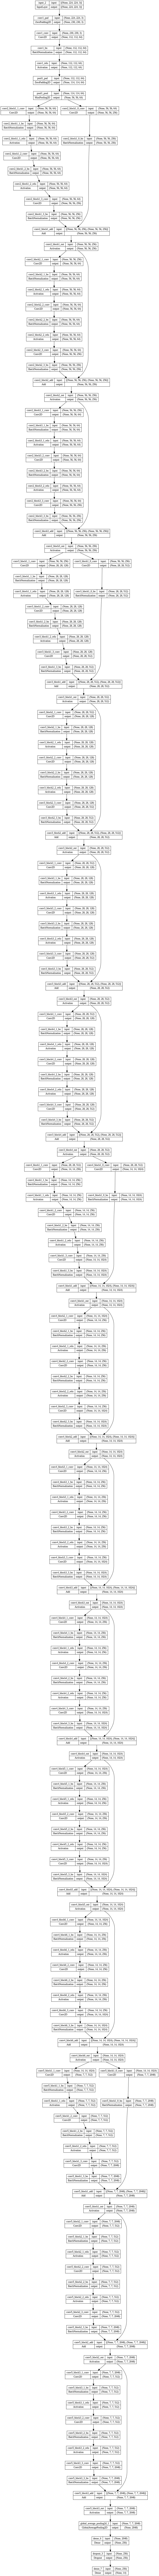

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# Load your saved model
model_path = '/content/drive/MyDrive/model/my_newmodel.h5'
loaded_model = load_model(model_path)

from tensorflow.keras.utils import plot_model
plot_model(loaded_model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random
from sklearn.metrics import classification_report, confusion_matrix

# Load your saved model
loaded_model =tf.keras.models.load_model('/content/drive/MyDrive/model/my_newmodel.h5')

# Initialize empty lists to store ground truth and predictions
ground_truth = []
predictions = []

# Loop through the validation dataset to get true labels and model predictions
for images, labels in val_ds:
    true_labels = np.argmax(labels, axis=1)  # Convert one-hot encoded labels to class indices
    predicted_labels = loaded_model.predict(images)
    predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert model predictions to class indices

    ground_truth.extend(true_labels)
    predictions.extend(predicted_labels)

# Calculate and print classification report
class_names = ["Ampulla of vater", "Blood - hematin", "Polyp", "Erythema", "Blood - fresh", "Erosion",
               "Lymphangiectasia", "Foreign body", "Ulcer", "Angiectasia", "Pylorus", "Reduced mucosal view",
               "Ileocecal valve", "Normal clean mucosa"]

print(classification_report(ground_truth, predictions, target_names=class_names))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(ground_truth, predictions)
print("Confusion Matrix:")
print(conf_matrix)


2/2 [==============================] - 1s 568ms/step
                      precision    recall  f1-score   support

    Ampulla of vater       0.00      0.00      0.00         2
     Blood - hematin       0.97      0.85      0.91       172
               Polyp       0.99      0.91      0.95        79
            Erythema       1.00      0.50      0.67         4
       Blood - fresh       0.97      0.47      0.63       119
             Erosion       1.00      0.34      0.51        35
    Lymphangiectasia       0.96      0.89      0.92       167
        Foreign body       0.96      0.92      0.94       829
               Ulcer       0.97      0.88      0.93       126
         Angiectasia       0.97      1.00      0.98      6875
             Pylorus       1.00      0.82      0.90        11
Reduced mucosal view       0.89      0.85      0.87       309
     Ileocecal valve       0.99      0.96      0.97       552
 Normal clean mucosa       0.97      0.89      0.93       167

            acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
 #Sensitivity, Specificity, and Kappa Score Calculation for each class
from sklearn.metrics import confusion_matrix, cohen_kappa_score
true_positive = np.diag(conf_matrix)
false_positive = np.sum(conf_matrix, axis=0) - true_positive
false_negative = np.sum(conf_matrix, axis=1) - true_positive
true_negative = np.sum(conf_matrix) - (true_positive + false_positive + false_negative)

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Macro-averaged values
macro_avg_sensitivity = np.mean(sensitivity)
macro_avg_specificity = np.mean(specificity)

# Cohen's Kappa Score Calculation
kappa = cohen_kappa_score(ground_truth, predictions)

# Print or use the metrics as needed
print("Overall Sensitivity (Recall):", macro_avg_sensitivity)
print("Overall Specificity:", macro_avg_specificity)
print("Overall Cohen's Kappa Score:", kappa)

Overall Sensitivity (Recall): 0.7351820309613867
Overall Specificity: 0.9925103596897191
Overall Cohen's Kappa Score: 0.9193561544998919


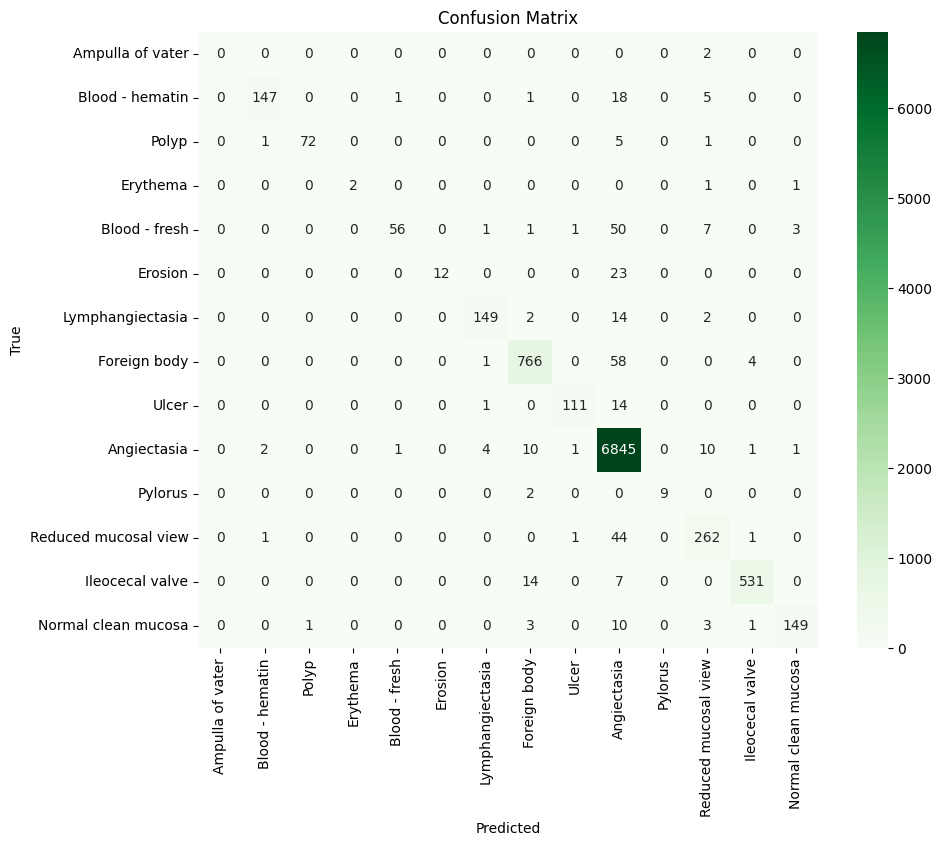

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
pip install tensorflow-model-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

# Load your quantized and pruned model
model_path = '/content/drive/MyDrive/model/my_newmodel.h5'
pruned_quantized_model = tf.keras.models.load_model(model_path)


In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_quantized_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
tflite_model_path = '/content/drive/MyDrive/model/tflite_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)
